**Linear Regression** is a statistical method which finds the linear relationship between dependent variables(Y) and independent variables(X). If the independent variables are more than 1, it is Multiple linear regression, otherwise it is called linear regression.
Linear regression can be implemented using normal equation and python sklearn's LinearRegression.

In [1]:
# Normal Equation:-
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

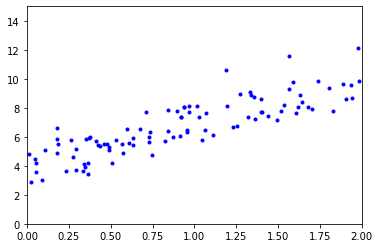

In [2]:
import matplotlib.pyplot as plt 
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [5]:
theta_best

array([[4.04984505],
       [2.93377336]])

In [6]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)

In [7]:
y_predict

array([[4.04984505],
       [9.91739176]])

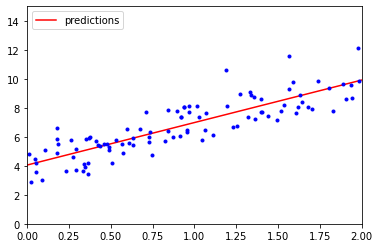

In [8]:
plt.plot(X_new, y_predict, "r-",label="predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left",fontsize=10)
plt.show()

In [9]:
# Using LinearRegression
from sklearn.linear_model import LinearRegression
ln_reg=LinearRegression()
ln_reg.fit(X,y)

LinearRegression()

In [10]:
# Checking model parameters
ln_reg.intercept_,ln_reg.coef_

(array([4.04984505]), array([[2.93377336]]))

In [11]:
# As, same as the normal equation.
ln_reg.predict(X_new)

array([[4.04984505],
       [9.91739176]])

## Gradient Descent:-

It is an iterative algorithm which is used to minimize the cost function using gradients i.e. partial derivatives of the model parameters. It analyzes how the cost function changes when changes occur in the model paramters.

**theta=theta-alpha*gradients** 
where alpha is the learning rate which tell us how much big step we have to take to reach the minima and gradient is the partial derivatives.

1. Batch gradient descent.

2. Stochastic gradient descent.

3. Mini-Batch gradient descent.

In [12]:
# Batch gradient descent
eta=0.1
n_iter=1000
m=100
theta=np.random.randn(2,1)
for iterations in range(n_iter):
    h=X_b.dot(theta)
    gradients=X_b.T.dot(h-y)*2/m
    theta=theta-eta*gradients


In [13]:
# Gradient descent is able to find the optimal values of model parameters as done earlier.
theta

array([[4.04984505],
       [2.93377336]])

In [14]:
theta_path_bgd=[] #Storing how the theta changes using batch gradient descent.
def plot_gradient_descent(theta,eta,theta_path=None):
    n_iter=1000
    for iterations in range(n_iter):
        plt.axis([0,2,0,15])
        if iterations<10:
            y_predict=X_new_b.dot(theta)
            style="b-" if iterations>0 else "r--"
            plt.plot(X_new,y_predict,style)
            plt.plot(X,y,'b.')
        if theta_path is not None:
            theta_path.append(theta)
        h=X_b.dot(theta)
        gradients=X_b.T.dot(h-y)*2/m
        theta=theta-eta*gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

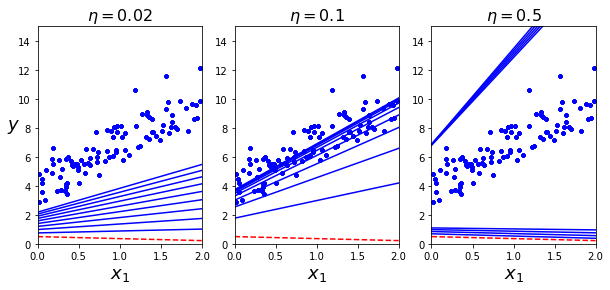

In [15]:
# Ploting different results using different learning rate.
#1. If the learning rate is too small, it will take more time to reach the minima.
#2. If it is too large, it will never converge to the minima.
#3. If it is coreect, it will take few iterations to reach the minima.
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

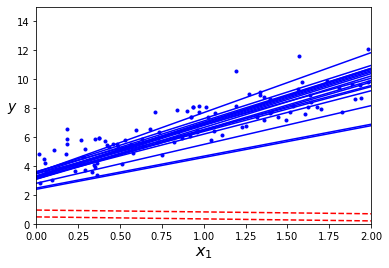

In [17]:
# Stochastic gradient descent
e_pochs=50
m=100
t0,t1=5,50

theta=np.random.randn(2,1)

def learning_schedule(t):
    return t0/(t+t1)

for e_poch in range(e_pochs):
    for i in range(m):
        if e_poch==0 and i<20:
            style="b-" if i>1 else "r--"
            y_predict=X_new_b.dot(theta)
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(e_poch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$y$',rotation=0,fontsize=14)
plt.axis([0, 2, 0, 15]) 
plt.show()


In [18]:
# These values are close to values computed by the batch gradient descent.
theta

array([[3.96663473],
       [2.92600972]])

In [19]:
# Implementing stochastic gradient descent usig sklearn.
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty=None, eta0=0.1, tol=1e-3, max_iter=1000)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.98941382]), array([2.90885247]))

In [21]:
# Mini-Batch gradient descent
theta_path_mgd=[]
n_iterations=100
mini_batch=20
np.random.seed(42)
theta=np.random.randn(2,1)

t0,t1=200,1000

def learning_schedule(t):
    return t0/(t+t1)

t=0
for n_iternation in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled=X_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,mini_batch):
        t+=1
        xi=X_b_shuffled[i:i+mini_batch]
        yi=y_shuffled[i:i+mini_batch]
        gradients=(2/mini_batch)*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)


In [22]:
# Almost same parameters as gradient descent.
theta

array([[4.09168492],
       [2.97306694]])

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

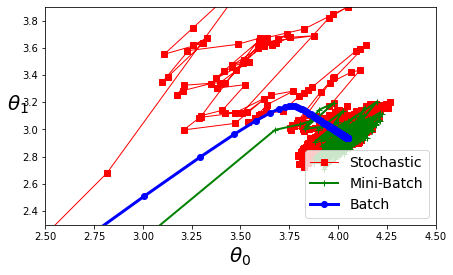

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',label='Stochastic',linewidth=1)
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',label='Mini-Batch',linewidth=2)
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',label='Batch',linewidth=3)
plt.legend(loc='lower right',fontsize=14)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20,rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


### Polynomial Regression

Polynomial regression is used in the cases where our data is non-linear i.e. it is statistical model which is used to find the linear relationship between dependent variable(Y) and independent variable(X) of nth degree.

In [25]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5+X**2+np.random.randn(m,1)+X*2

Text(0, 0.5, '$y$')

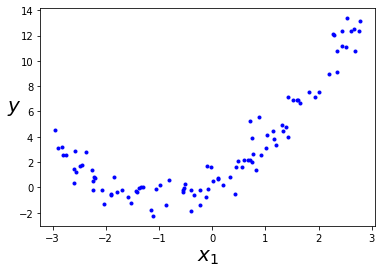

In [26]:
# Plotting the data
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$y$",fontsize=20,rotation=0)

In [27]:
# Creating a new polynomial features using sklearn
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [28]:
X[0],X_poly[0] #X_poly now contains the original feature X and the 2nd degree feature.

(array([-2.21391229]), array([-2.21391229,  4.90140762]))

In [29]:
# Fitting the model
lr_reg=LinearRegression()
lr_reg.fit(X_poly,y)

LinearRegression()

In [30]:
# Checking model parameters.
lr_reg.intercept_,lr_reg.coef_

(array([0.40326313]), array([[2.02460776, 0.99046516]]))

In [31]:
X_new_poly=np.arange(-3,3,0.5).reshape(-1,1)
X_new_poly_poly=poly_features.transform(X_new_poly)
y_predict_poly=lr_reg.predict(X_new_poly_poly)

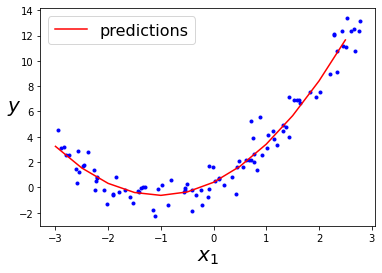

In [32]:
plt.plot(X,y,'b.')
plt.plot(X_new_poly,y_predict_poly,'r-',label='predictions')
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$y$",rotation=0,fontsize=20)
# plt.axis([-3, 3, 0,])
plt.show()

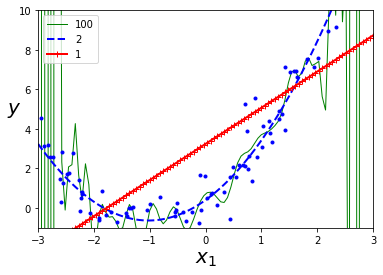

'This high-degree Polynomial Regression model is severely overfitting the\ntraining data, while the linear model is underfitting it. The model that will generalize\nbest in this case is the quadratic model.'

In [33]:
X_predict_poly=np.linspace(-3,3,100).reshape(100,1)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (("g-",1,100),("b--",2,2),("r-+",2,1)):
    polybig=PolynomialFeatures(degree=degree,include_bias=False)
    lin_reg=LinearRegression()
    std=StandardScaler()
    polynomial_regression=Pipeline([
        ("poly_features",polybig),
        ("std_scaler",std),
        ("lin_reg",lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_new_big=polynomial_regression.predict(X_predict_poly)
    plt.plot(X_predict_poly,y_new_big,style,label=str(degree),linewidth=width)
plt.plot(X,y,'b.',linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$y$",fontsize=20,rotation=0)
plt.axis([-3, 3, -1, 10])
plt.show()

'''This high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. The model that will generalize
best in this case is the quadratic model.'''


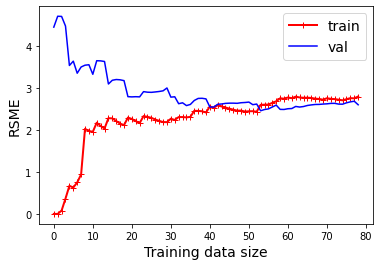

In [34]:
# How underfitting occurs:-
# As we can see in the graph, there is no gap between the error of training set and validation
# set, which means the model is not performing well on training data as well as the test data.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_model_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_model_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",label="val")
    plt.xlabel("Training data size",fontsize=14)
    plt.ylabel("RSME",fontsize=14)
    plt.legend(fontsize=14)
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,X,y)

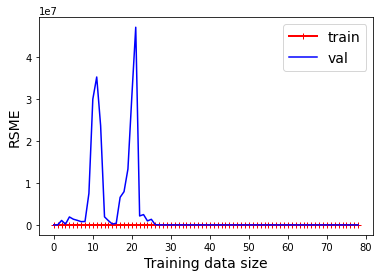

In [58]:
# How overfitting occurs when the model is too complex:-
# The model is performing quite well on the training data but showing error in th test data.
from sklearn.pipeline import Pipeline
polyno_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=20,include_bias=False)),
    ("lin_reg",LinearRegression()),
    ])
plot_learning_curve(polyno_regression,X,y)

## Regularized Linear model

In [59]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [60]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [61]:
ridge_reg=Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

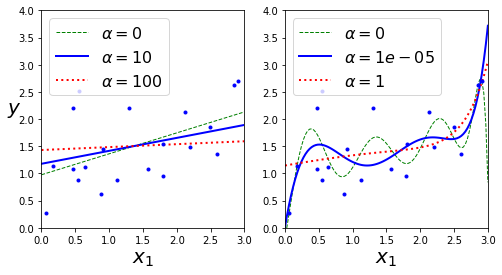

In [70]:
def plot_rigde_model(model_class, polynomial,alphas, **model_kwargs):
    for alpha, style in zip((alphas), ('g--','b-','r:')):
        model=model_class(alpha, **model_kwargs) if alpha>0 else LinearRegression()
        if polynomial:
            model=Pipeline([
                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scalar",StandardScaler()),
                ("reg_model",model),
            ])
        model.fit(X,y)
        y_new_regu=model.predict(X_new)
        lw=2 if alpha>0 else 1
        plt.plot(X_new,y_new_regu, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,'b.')
    plt.legend(loc="upper left",fontsize=16)
    plt.xlabel("$x_1$",fontsize=20)
    plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_rigde_model(Ridge,polynomial=False,alphas=(0,10,100), random_state=42)
plt.ylabel("$y$",fontsize=20,rotation=0)
plt.subplot(122)
plot_rigde_model(Ridge,polynomial=True,alphas=(0,10**-5,1), random_state=42)

plt.show()

In [72]:
# Gradient descent with regularization
# The penalty hyperparameter tell the stochastic gradient descent to add the regularization
# term in the cost function which is the alpha*A where is the sum of squares of the model 
# parameter. 
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.4717882])

c:\Users\bansa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


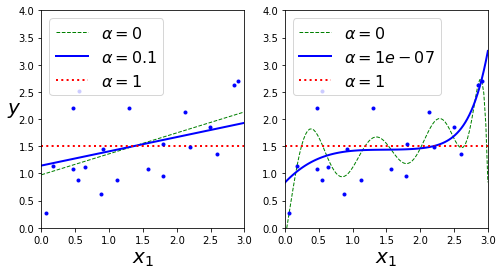

In [73]:
# Lasso Regression(least absolute shrinkage and selection operator)
# It is another different form of the regularization, but instead of using the squares
# of the model parameters,it uses the absolute value i.e. l1 norm form.
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_rigde_model(Lasso,polynomial=False,alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$",fontsize=20,rotation=0)
plt.subplot(122)
plot_rigde_model(Lasso,polynomial=True,alphas=(0,10**-7,1), random_state=42)

In [74]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y.ravel())
lasso_reg.predict([[1.5]])

array([1.53788174])

In [75]:
'''Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression'''
from sklearn.linear_model import ElasticNet
elastic_reg=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_reg.fit(X,y.ravel())
elastic_reg.predict([[1.5]])

array([1.54333232])

c:\Users\bansa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


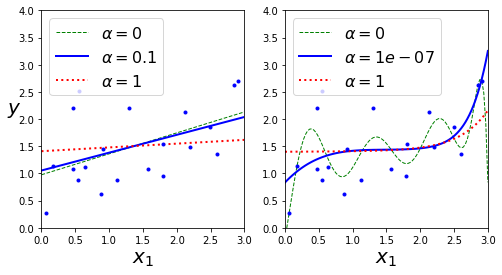

In [80]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_rigde_model(ElasticNet,polynomial=False,alphas=(0,0.1,1),l1_ratio=0.2, random_state=42)
plt.ylabel("$y$",fontsize=20,rotation=0)
plt.subplot(122)
plot_rigde_model(ElasticNet,polynomial=True,alphas=(0,10**-7,1),l1_ratio=0.2, random_state=42)

#### **Early Stopping**

In [81]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [84]:
from copy import deepcopy

poly_scaler=Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scalar",StandardScaler()),
])
X_train_poly=poly_scaler.fit_transform(X_train)
X_val_poly=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(penalty=None,learning_rate="constant",eta0=0.0005,tol=-np.infty,
random_state=42,max_iter=1)

best_epoch=None
best_model=None
minimum_cost=np.infty
for epoch in range(1000):
    sgd_reg.fit(X_train_poly,y_train)
    y_predict_poly=sgd_reg.predict(X_val_poly)
    val_error=mean_squared_error(y_predict_poly,y_val)
    if val_error<minimum_cost:
        minimum_cost=val_error
        best_epoch=epoch 
        best_model=deepcopy(sgd_reg)

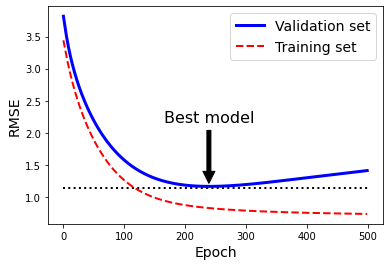

In [88]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly)
    y_val_predict = sgd_reg.predict(X_val_poly)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [89]:
best_epoch,best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf))